# California Housing Price Prediction (Multiple Linear Regression)

## Project Overview
This project implements a **Multiple Linear Regression** model to predict the median house value in California districts. Utilizing the 1990 U.S. Census data, the model analyzes how economic factors, household characteristics, and geographic location influence property values.

## Dataset Characteristics
The dataset consists of **20,640 instances** with 8 numeric predictive attributes:
- **MedInc**: Median income in block group.
- **HouseAge**: Median house age in block group.
- **AveRooms**: Average number of rooms per household.
- **AveBedrms**: Average number of bedrooms per household.
- **Population**: Block group population.
- **AveOccup**: Average number of household members.
- **Latitude**: Block group latitude.
- **Longitude**: Block group longitude.

**Target Variable:**
- **Median House Value**: Expressed in hundreds of thousands of dollars ($100,000).

In [173]:
from sklearn.datasets import fetch_california_housing

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [175]:
california=fetch_california_housing()

In [176]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [177]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [220]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [179]:
california.target_names

['MedHouseVal']

In [180]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [181]:
print(california.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [182]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [183]:
# Preparing the dataframe
df=pd.DataFrame(california.data,columns=california.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [184]:
df['Price'] = california.target

In [185]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [187]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [188]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [189]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Figure size 1000x700 with 0 Axes>

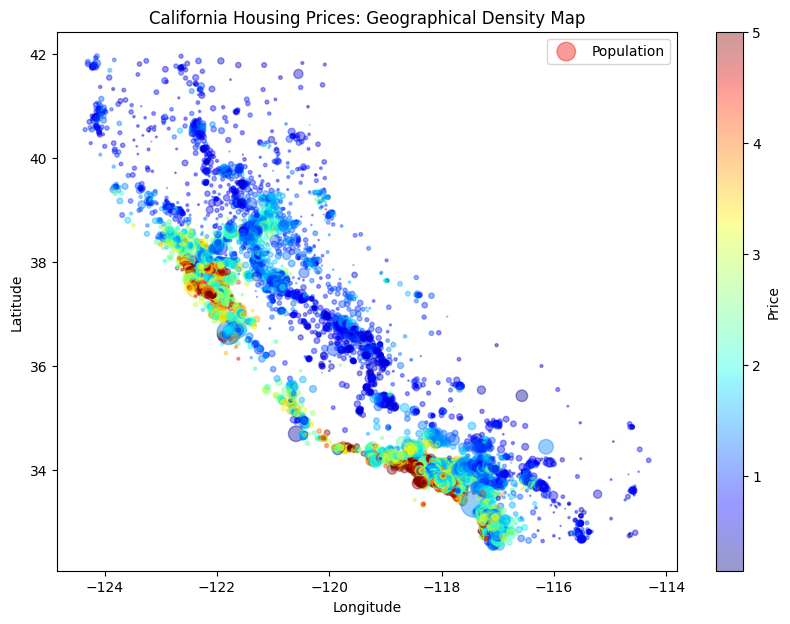

In [221]:
# Visualizing the geographical data to see price density
plt.figure(figsize=(10, 7))
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
        s=df["Population"]/100, label="Population", figsize=(10,7),
        c="Price", cmap=plt.get_cmap("jet"), colorbar=True,
        sharex=False)
plt.title("California Housing Prices: Geographical Density Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

In [222]:
# Capping/Filtering outliers for model stability 
# Based on the dataset description regarding vacation resorts
df = df[df['AveRooms'] < 15]
df = df[df['AveBedrms'] < 10]
df = df[df['AveOccup'] < 10]

print(f"Dataset size after filtering outliers: {df.shape}")

Dataset size after filtering outliers: (20495, 9)


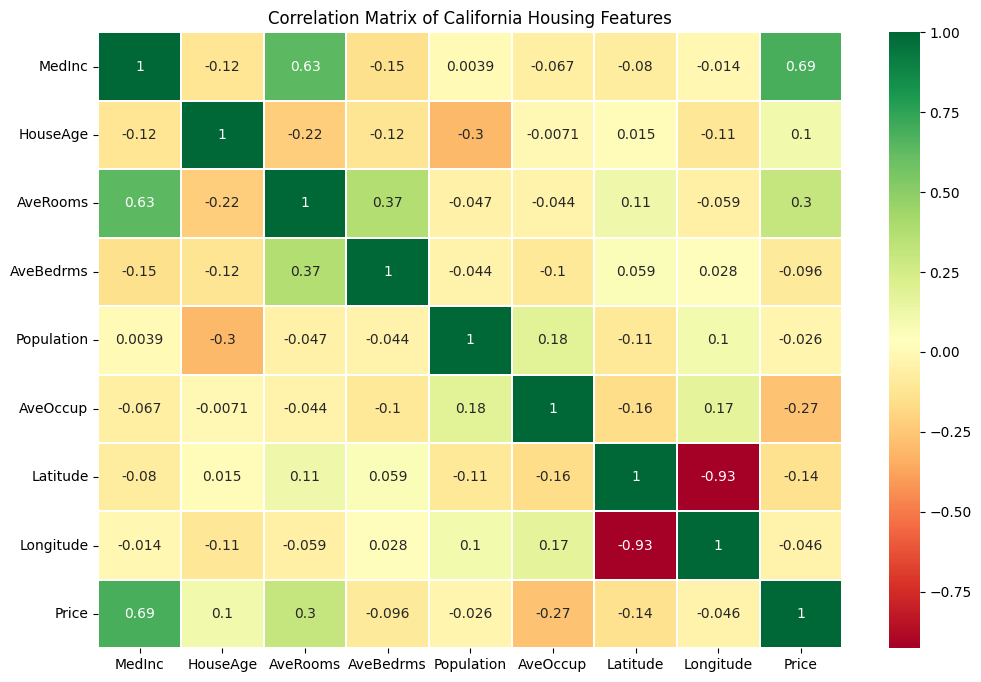

In [225]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
plt.title('Correlation Matrix of California Housing Features')
plt.show()

### I am checking for Multicollinearity between features.In the California Housing dataset, AveRooms and AveBedrms are often highly correlated. High correlation between independent variables can make the regression coefficients unstable.

### Dividing the dataset

In [226]:
## Independent and Dependent features
X = df.iloc[:,:-1] #independent features
y = df.iloc[:,-1] #dependent features

In [227]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 10)

In [229]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((13731, 8), (6764, 8), (13731,), (6764,))

In [230]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [231]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [232]:
X_train

array([[ 0.27137395,  0.74159684, -0.31511604, ..., -0.22178221,
        -0.76471478,  0.75382294],
       [-0.12579147,  1.85676793, -0.77392647, ..., -0.52585716,
        -0.83463393,  0.62928295],
       [ 0.08777762,  0.5026316 , -0.66313477, ..., -1.35333173,
        -0.73674713,  0.58943016],
       ...,
       [ 0.46995666, -1.09046995, -0.48085566, ...,  0.43664629,
         0.84808683, -1.15412972],
       [-0.68431195,  0.74159684, -1.27982613, ...,  1.04221562,
        -0.76937606,  0.69404375],
       [ 0.80219876, -0.53288441,  1.28678519, ...,  0.30192364,
         0.81545789, -1.10431373]], shape=(13731, 8))

In [233]:
X_test

array([[-0.91307923,  0.10435622, -0.2397428 , ..., -0.8645294 ,
         0.53578131, -0.093049  ],
       [-0.90174678, -0.45322933, -0.88926367, ..., -1.24298831,
        -1.33805177,  1.22209331],
       [-1.02412668, -0.2142641 , -0.83240778, ...,  0.35662355,
        -0.62487649,  0.13610459],
       ...,
       [-0.83030996,  0.42297653, -0.87086204, ...,  0.619457  ,
        -0.78335989,  0.64920935],
       [-0.42366553,  0.34332145, -0.73773268, ...,  2.95138278,
        -0.73674713,  0.77374934],
       [-1.16911853,  0.5026316 , -0.32894106, ...,  0.74439662,
         0.52179748, -0.093049  ]], shape=(6764, 8))

## Model training

In [234]:
from sklearn.linear_model import LinearRegression

In [235]:
regression=LinearRegression()

In [236]:
regression

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [237]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [238]:
## slope or coefficients
regression.coef_

array([ 0.81282815,  0.13331706, -0.14592387,  0.13276567,  0.04150788,
       -0.26183212, -0.94205751, -0.86547963])

In [239]:
## intercepts
regression.intercept_

np.float64(2.0715679426116136)

In [240]:
## Prediction for the test data
y_pred=regression.predict(X_test)

In [241]:
y_test

2284     0.788
14068    1.161
20226    1.605
12798    0.631
20065    1.126
         ...  
19116    2.008
7462     1.472
5175     0.888
6549     1.658
2100     0.494
Name: Price, Length: 6764, dtype: float64

In [242]:
y_pred

array([1.24181019, 1.95855638, 1.75848566, ..., 1.55173289, 1.21399385,
       0.65678661], shape=(6764,))

In [243]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.43898110991394007
0.4871342710974457
0.6625564956393832


In [244]:
## R square and adjusted R square

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.668211954536555


In [245]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6678190153265318

## Assumptions

Text(0, 0.5, 'Test Predicted Data')

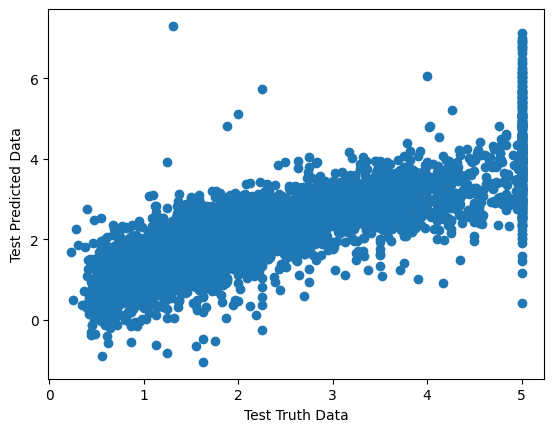

In [246]:
plt.scatter(y_test,y_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [247]:
residuals=y_test-y_pred

In [248]:
residuals

2284    -0.453810
14068   -0.797556
20226   -0.153486
12798   -0.030044
20065    0.374026
           ...   
19116   -0.440048
7462    -0.086233
5175    -0.663733
6549     0.444006
2100    -0.162787
Name: Price, Length: 6764, dtype: float64

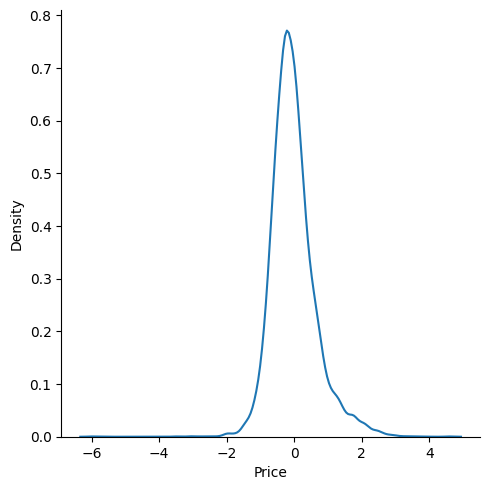

In [249]:
sns.displot(residuals,kind="kde")

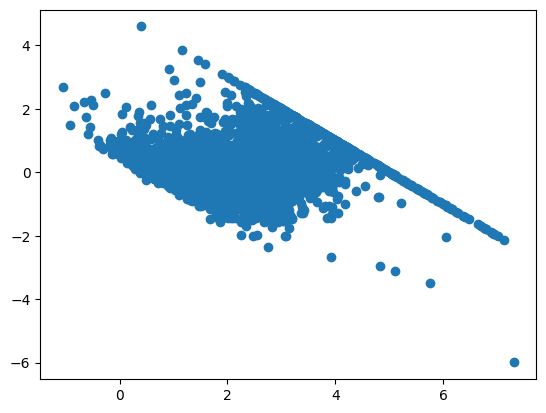

In [250]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(y_pred,residuals)

In [251]:
regression

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Creation of pickle file

In [252]:
import pickle
pickle.dump(regression,open('regressor.pkl','wb'))

In [253]:
model=pickle.load(open('regressor.pkl','rb'))

In [254]:
model.predict(X_test)

array([1.24181019, 1.95855638, 1.75848566, ..., 1.55173289, 1.21399385,
       0.65678661], shape=(6764,))